Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
데이터 샘플:
   Total Packets  Incoming Packets  Outgoing Packets  Incoming Ratio  \
0         1421.0             121.0            1300.0        0.085151   
1          518.0              80.0             438.0        0.154440   
2         1358.0             118.0            1240.0        0.086892   
3         1446.0             122.0            1324.0        0.084371   
4         1406.0             115.0            1291.0        0.081792   

   Outgoing Ratio  Outgoing Std  Outgoing Mean  Packets per Second  \
0        0.914849    515.483953     773.322314          140.138067   
1        0.845560    139.231951     226.162500           50.984252   
2        0.913108    472.735508     786.110169          122.232223   
3        0.915629    513.916038     820.139344          108.233533   
4        0.918208    503.993490     789.608696          132.142857   

   First 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


475/475 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0559 - loss: 4.2480 - val_accuracy: 0.1668 - val_loss: 3.4655
Epoch 2/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1419 - loss: 3.5639 - val_accuracy: 0.2371 - val_loss: 3.1919
Epoch 3/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1864 - loss: 3.3198 - val_accuracy: 0.2695 - val_loss: 2.9947
Epoch 4/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2188 - loss: 3.1433 - val_accuracy: 0.2976 - val_loss: 2.8629
Epoch 5/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2408 - loss: 3.0244 - val_accuracy: 0.3208 - val_loss: 2.7485
Epoch 6/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2673 - loss: 2.8921 - val_accuracy: 0.3403 - val_loss: 2.6667
Epoch 7/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2767 - loss: 2.8670 - val_accuracy: 0.3503 - val_loss: 2.5891
Epoch 8/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3007 - loss: 2.7510 - val_accuracy: 0.3584 - val_

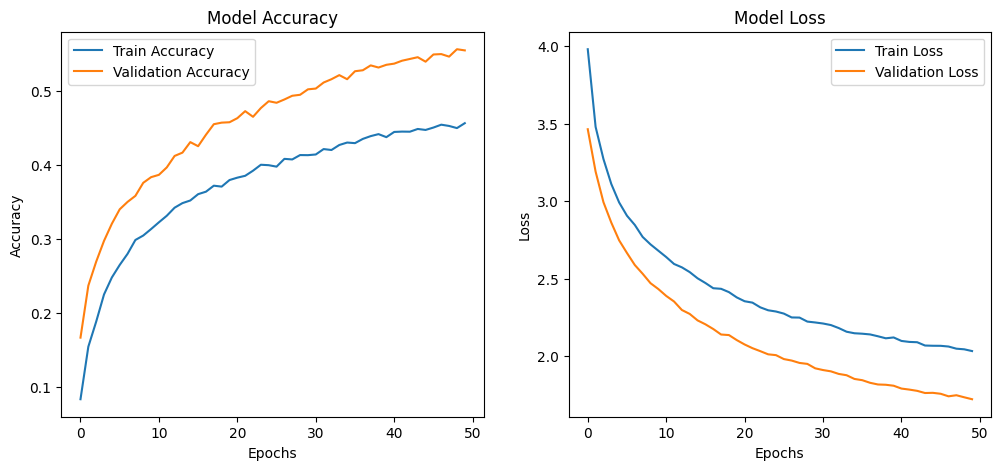

In [ ]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/mon.csv'
data = pd.read_csv(file_path)

# 데이터 확인
print("데이터 샘플:")
print(data.head())

# 특징(X)과 레이블(y) 분리
X = data.iloc[:, :-1].values  # 특징 (feature)들
y = data.iloc[:, -1].values   # 레이블 (0~94)

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 레이블 원-핫 인코딩 (One-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=95)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=95)

# Neural Network 모델 생성
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # 입력층
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))  # 은닉층
model.add(Dropout(0.3))
model.add(Dense(95, activation='softmax'))  # 출력층 (0~94 레이블, 총 95개)

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# 모델 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# 예측 및 성능 평가
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

print("\n분류 보고서:")
print(classification_report(y_test_labels, y_pred_labels))

# 학습 곡선 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
